In [1]:
import numpy as np
import maze as mz 
import problem_1 as pb1

# Problem 1: The Maze and the Random Minotaur

We start first by describing the maze as a numpy array. 

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

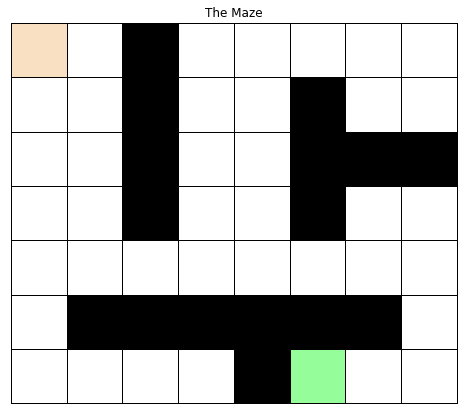

In [3]:
mz.draw_maze(maze)

In [4]:
# Create an environment maze
env = mz.Maze(maze)
# env.show()

In [5]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env,horizon)
print(policy)

[[0. 0. 0. ... 0. 0. 0.]
 [4. 4. 4. ... 2. 2. 2.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
method = 'DynProg'
start = (0, 0, 6, 5)
path = env.simulate(start, policy, method)

In [7]:
# mz.animate_solution(maze, path)

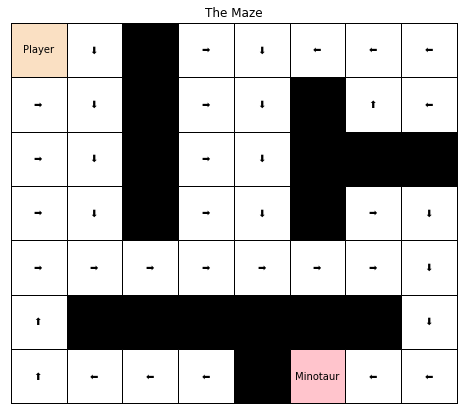

In [8]:
env.draw_optimal_policy(maze, (6, 5), policy)

Completed simulation for T = 20, obtained exit prob = 0.200
Completed simulation for T = 21, obtained exit prob = 0.340
Completed simulation for T = 22, obtained exit prob = 0.390
Completed simulation for T = 23, obtained exit prob = 0.360
Completed simulation for T = 24, obtained exit prob = 0.440
Completed simulation for T = 25, obtained exit prob = 0.490
Completed simulation for T = 26, obtained exit prob = 0.570
Completed simulation for T = 27, obtained exit prob = 0.510
Completed simulation for T = 28, obtained exit prob = 0.600
Completed simulation for T = 29, obtained exit prob = 0.650
Completed simulation for T = 30, obtained exit prob = 0.510
Completed simulation for T = 31, obtained exit prob = 0.650
Completed simulation for T = 32, obtained exit prob = 0.670
Completed simulation for T = 33, obtained exit prob = 0.660
Completed simulation for T = 34, obtained exit prob = 0.670
Completed simulation for T = 35, obtained exit prob = 0.650
Completed simulation for T = 36, obtaine

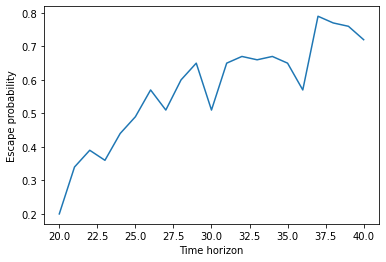

In [10]:
pb1.run()